# Actividad 4 - Patrones con K-means
## Equipo 3:
#### Carlos Damián Suárez Bernal
#### Aylín Millán Cázares
#### Adrián Lozano González
#### Jennifer Lizeth Avendaño Sánchez

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
 
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

dataframe = pd.read_csv("avocado.csv")
dataframe.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


<ipython-input-20-5bed37939c3f>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  dataframe.drop(['region'],1).hist()


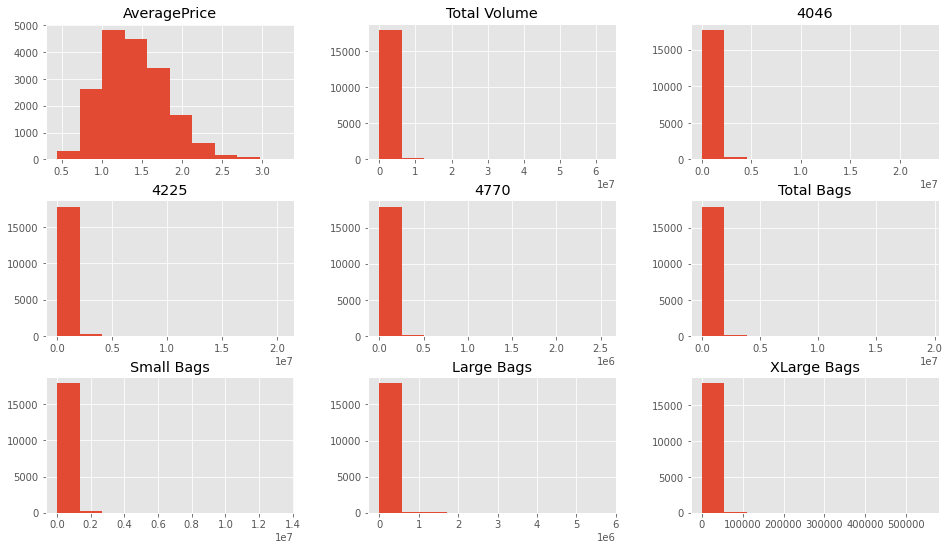

In [ ]:
#dataframe = dataframe.drop(['Unnamed: 0'],1)
#dataframe = dataframe.drop(['year'],1)
dataframe.drop(['region'],1).hist()
plt.show()

/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


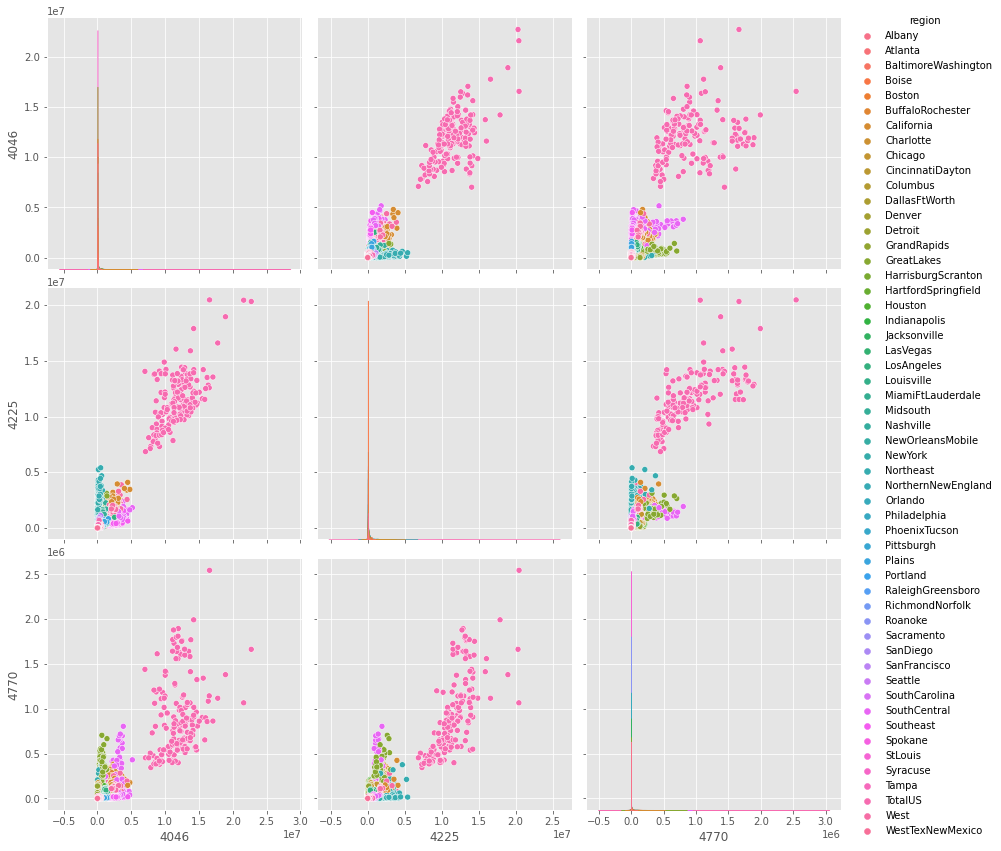

In [ ]:
sb.pairplot(dataframe.dropna(), hue='region',size=4,vars=["4046","4225","4770"],kind='scatter')

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

[-5.586902283860671e+16, -1.0452311743865094e+16, -5202792262643282.0, -3987732883147481.0, -3201580412908128.5, -2628734754889529.5, -2186950731472223.5, -1939750684210426.0, -1721395398079174.8, -1539044773738264.8, -1331612499733045.5, -1190300084856620.0, -1047842542239660.1, -971049645281790.4, -904983903877738.2, -860323978783909.8, -812048026576868.5, -775787619737163.1, -716803496394354.9]


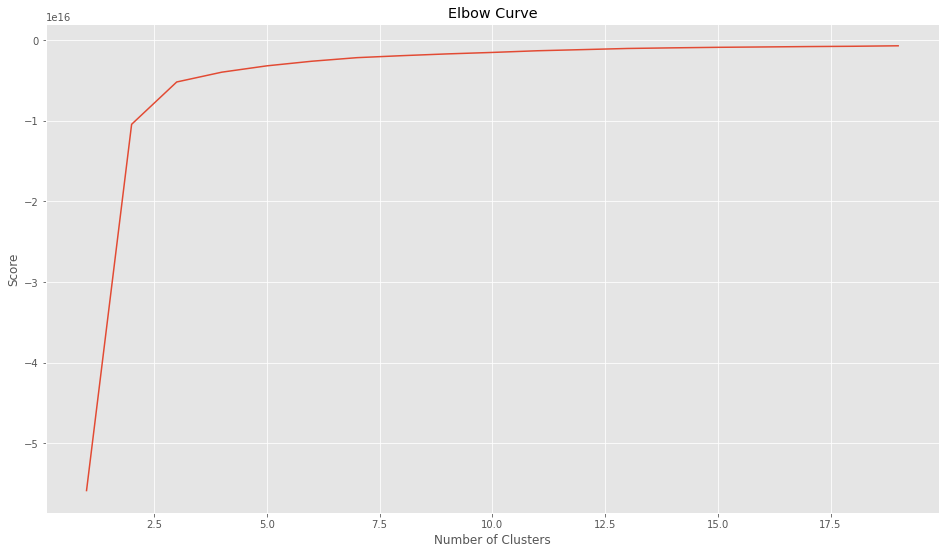

In [ ]:
Nc = range(1, 20)
x = np.array(dataframe[["4046","4225","4770"]])
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(x).score(x) for i in range(len(kmeans))]
print(score)
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=5).fit(x)
centroids = kmeans.cluster_centers_
print(centroids)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[[7.80864645e+04 8.51598624e+04 6.13188476e+03]
 [1.34893691e+07 1.28385585e+07 1.08740193e+06]
 [4.77029138e+05 1.79097825e+06 1.34054229e+05]
 [2.44250227e+06 1.32287860e+06 1.12288922e+05]
 [1.01580686e+07 1.00811599e+07 7.07269179e+05]]


<Figure size 1152x648 with 0 Axes>

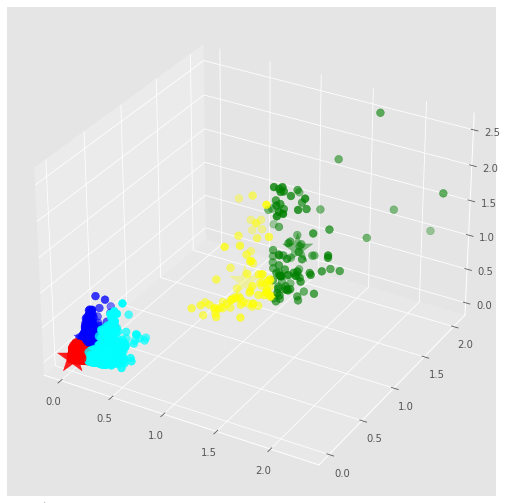

In [ ]:
# Predicting the clusters
labels = kmeans.predict(x)
# Getting the cluster centers
C = kmeans.cluster_centers_
colores=['red','green','blue','cyan','yellow']
asignar=[]
for row in labels:
    asignar.append(colores[row])

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(x[:, 0], x[:, 1], x[:, 2], c=asignar,s=60)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c=colores, s=1000)

# Predicting the clusters
labels = kmeans.predict(x)
# Getting the cluster centers
C = kmeans.cluster_centers_
colores=['red','green','blue','cyan','yellow']
asignar=[]
for row in labels:
    asignar.append(colores[row])
 
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(x[:, 0], x[:, 1], x[:, 2], c=asignar,s=60)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c=colores, s=1000)

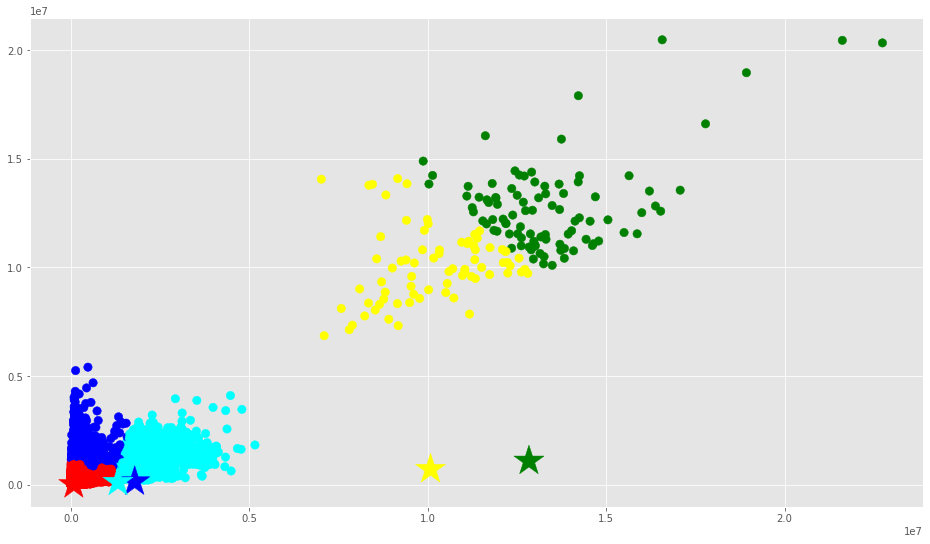

In [ ]:
f1 = dataframe['4046'].values
f2 = dataframe['4225'].values
 
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 1], C[:, 2], marker='*', c=colores, s=1000)
plt.show()

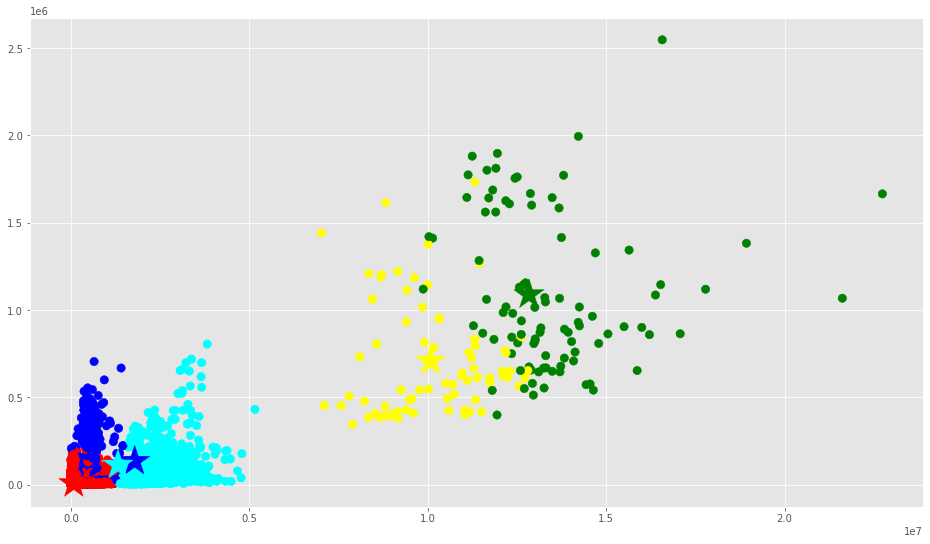

In [ ]:
f1 = dataframe['4046'].values
f2 = dataframe['4770'].values
 
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 1], C[:, 2], marker='*', c=colores, s=1000)
plt.show()

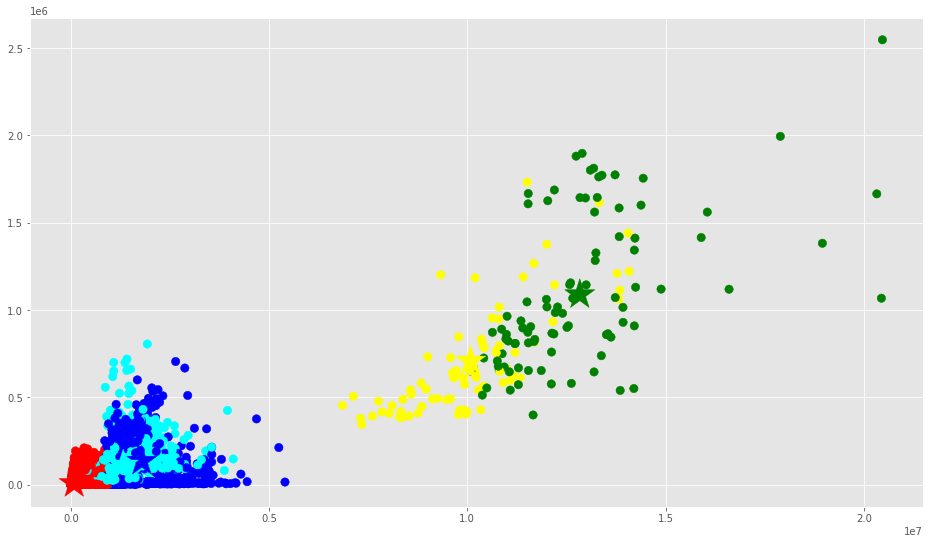

In [ ]:
f1 = dataframe['4225'].values
f2 = dataframe['4770'].values
 
plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 1], C[:, 2], marker='*', c=colores, s=1000)
plt.show()

**Conlusión Adrián:**

**1. ¿Crees que estos centros puedan ser representativos de los datos? ¿Por qué?**
  
  Los centros en sí son esenciales para conocer la distancia mínima de todos los puntos hacia ese en cada cluster/grupo. Esto es para encontrar el punto más representativo de cada cluster relacionando el PLU y la región.

**2. ¿Cómo obtuviste el valor de k a usar?**

La gráfica de codo fue algo esencial a la hora de calcular la k ya que cuando la score comience a ser constante en función de la cantidad de grupos es cuando por más grupos que se añadan la score no cambiará. Con esto se encontró que **k = 3** aproximadamente. Ahora bien, gráficamente se pueden observar tres grupos principales (donde 3 están unidos en uno).

**3. ¿Los centros serían más representativos si usaras un valor más alto? ¿Más bajo?**

Si se usará un valor más bajo sería más representativo porque habría menos grupos representando el total de los datos, mientras que si fuera más alto se crearían los mismos grupos seccionados entre sí. Si es menor siempre y cuando esté en el rango que comenté en la pregunta anterior, será mejor representativo y más eficiente.

**4. ¿Qué distancia tienen los centros entre sí? ¿Hay alguno que esté muy cercano a otros?**

Tres de ellos estaban en el mismo lugar y esto indica que esa sección entre esos tres grupos podría ser un único grupo, los otros dos estaban más alejados, implicando que esas regiones no producen en lo absoluto los aguacates con el mismo PLU.

**5. ¿Qué pasaría con los centros si tuviéramos muchos outliers en el análisis de cajas y bigotes?**

Sería más complicado conocer los centros ya que ese análisis suele ser lineal y no habría grupos de datos tan cerrados, volviendo todo menos preciso.

**6. ¿Qué puedes decir de los datos basándose en los centros?**

Los centros indican el dato más representativo de grupos, ahora bien esto quiere decir que los valores más cerca del centro y están más juntos podrían generar una cantidad muy similar de aguacates con el mismo PLU, esto nos lleva a que estas regiones entre sí puedan competir o tengan un mercado más complicado.

Conclusión Aylín

**1. ¿Crees que estos centros puedan ser representativos de los datos? ¿Por qué?**

De esta manera podemos observar de que manera se relacionan los datos graficados. Además de que de esta manera se pueden dividir y encontrar el punto más representativo de todos los datos, en este caso la relación de PLU y la región 

**2. ¿Cómo obtuviste el valor de k a usar?**

  K se obtuvo de las distintas gráficas que sacamos, en este caso la que tuvo más peso en esto fue la gráfica de codo. Porque de esta manera logramos observar como es que se comportaba y cuando no había desviación ahi se encontraba nuestro valor de k.  

**3. ¿Los centros serían más representativos si usaras un valor más alto? ¿Más bajo?**

 Si los centros fueran más bajos serían más representativos debido a que en una de las gráficas podemos observar como se concentran en un espacio más pequeño y se nos era más difícil ver las distancias. Si fueran más altos igual por las distancias no se podría detectar bien los centros y podrían convertirse en menos. 

**4. ¿Qué distancia tienen los centros entre sí? ¿Hay alguno que esté muy cercano a otros?**

  Encontramos que 3 de ellos estaban muy cerca entre ellos, por lo que se detectaba como si fuera uno si no fuera por los colores no se podría detectar bien los datos que se encontraban ahí o donde se encontraban los centros. Otros dos los logramos ver bien ya que su distancia era mayor. 

**5. ¿Qué pasaría con los centros si tuviéramos muchos outliers en el análisis de cajas y bigotes?**

Los centros desaparecerían o ya no existirían debido a que como es un sistema lineal ya no podríamos detectar donde se encuentran sus relaciones.   

**6. ¿Qué puedes decir de los datos basándose en los centros?**

  Gracias a las gráficas pudimos observar que los centros son los tipos de aguacates y todos los puntos a su alrededor eran los estados. Por lo que concluimos que los puntos que se encontraban más cerca de los centros eran estados que producían o vendían más y competían con los demás puntos a su alrededor. 

Conlusión Damian:

Conisdero que los centros pueden ser representativos de los datos debido a su posición en la gráfica y como es que estos se encuentran en relación de unos con otros, de manera que los podemos dividir en regiones y subregiones en la venta de estos.El valor de K fue determinado por el método de elbow en el cual nos da el número de datos que obtuvimos. Los centros serían menos representativos si utilizaramos un valor más bajo debido a que existen muchos centros que se encuentran en lugares similares. Si existieran muchos outliers en el análisis de cajas y bigotes, los centros se volverían muy poco precisios debido a que no tendrían un cluster de datos tan cerrados. Finalmente, basandose en los centros, que existen varios grupos muy similares que pueden ser considerados competencia unos con otros, debido a que estan bastante cercanos.



Conlusión Jenny:

1. ¿Crees que estos centros puedan ser representativos de los datos? ¿Por qué?

Desde mi punto de vista, los centros sí pueden ser representativos de los datos ya que los centros son características en común que tienen los datos.

2. ¿Cómo obtuviste el valor de k a usar?

Para determinar la k, usamos una gráfica de codo. Con la gráfica previamente obtenida se escogió la score variara menos se escogió la k.

3. ¿Los centros serían más representativos si usaras un valor más alto? ¿Más bajo?

Los centros serían más representativos si se usara un valor de k bajo, ya que se observarían mejor los centros al existir menos clusters.

4. ¿Qué distancia tienen los centros entre sí? ¿Hay alguno que esté muy cercano a otros?

Tres estaban muy cercanos uno del otro lo que nos hizo concluir que era necesario solo un grupo en ese caso, indicando que esos tres grupos y los demás dos generan tipos de aguacate completamente distintos.

5. ¿Qué pasaría con los centros si tuviéramos muchos outliers en el análisis de cajas y bigotes?

Si el análisis fuera de cajas y bigotes, los datos no serían igual de precisos, ya que habrían valores más cerrados en cada cluster.

6. ¿Qué puedes decir de los datos basándose en los centros?

Hay regiones en las que los centros están bastante cerca, es decir tienen varias similitudes.